In [1]:
import cv2
import numpy as np
import os, glob
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 在jupyter中显示图像
def show_image(image, cmap=None):
    cols = 1
    rows = (len(image)+1)//cols
    plt.figure(figsize=(5, 6))
    for i, image in enumerate(image):
        plt.subplot(rows, cols, i+1)
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

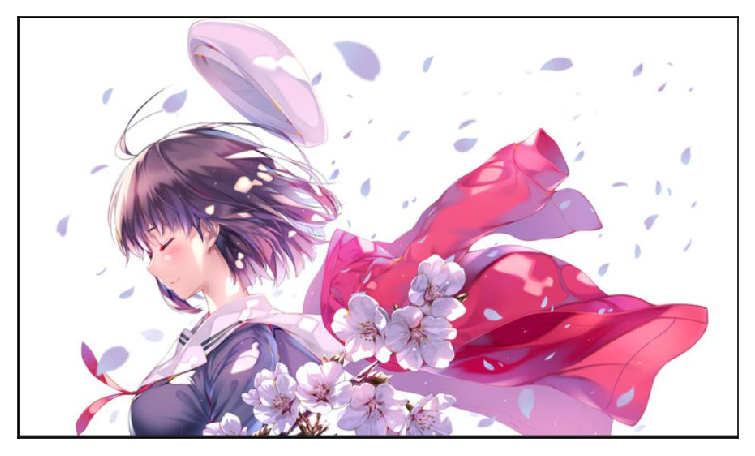

In [3]:
# 第一次读取显示图片
img = plt.imread('resources/megumi.jpg')
show_image([img])

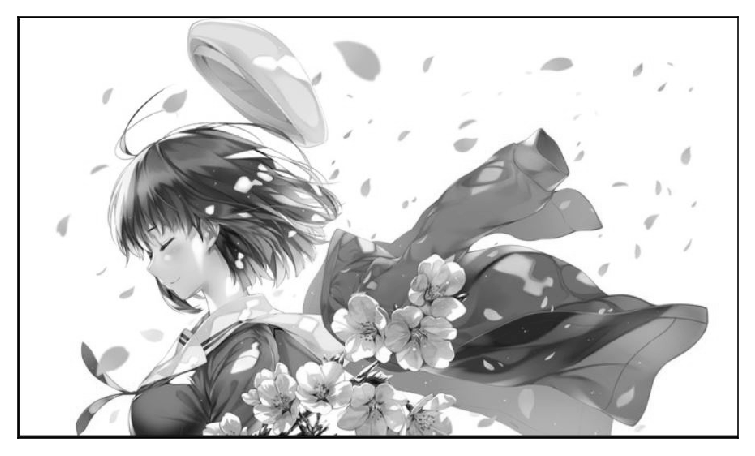

In [4]:
show_image([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)])

In [5]:
#打印图片属性
def print_img_info(img):
    print('type of a img:' + str(type(img)))
    print('shape of img' + str(img.shape))
    print(img.size)
    print(img.dtype)
    
print_img_info(img)

type of a img:<class 'numpy.ndarray'>
shape of img(519, 888, 3)
1382616
uint8


1.可以看到，opencv在python中读取的类型时numpy的ndarray数组序列。  
2.彩色图片是由x,y,z组成，其中z是三维的，表示RGB颜色通道。  
3.在opencv中读取的是BGR，而在plt中需要RGB，通过COLOR_BGR2RGB转换。  


In [6]:
# 打开摄像头并显示
cap = cv2.VideoCapture(0)
#fourcc = cv2.VideoWriter_fourcc(*'XVID')

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', frame)
    cv2.imshow('frame2', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        # 按q退出

cap.release()
cv2.destroyAllWindows()

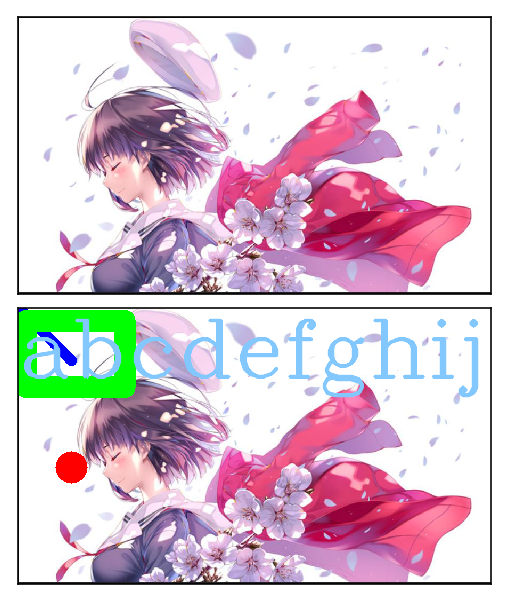

In [6]:
# opencv画线，会同时修改原图。需要经过img.copy()拷贝一份。
img_copy = img.copy()
img_line = cv2.line(img_copy, (0, 0), (100, 100), (0, 0, 255), 20)
img_line2 = cv2.rectangle(img_copy, (15, 25), (200, 150), (0, 255, 0), 40)
img_line3 = cv2.circle(img_copy, (100, 300), 30, (255, 0, 0), -1)

font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img_copy, 'abcdefghijklmn', (0, 130), font, 5, (130,200,255), 5, cv2.LINE_AA)
show_image([img, img_copy])

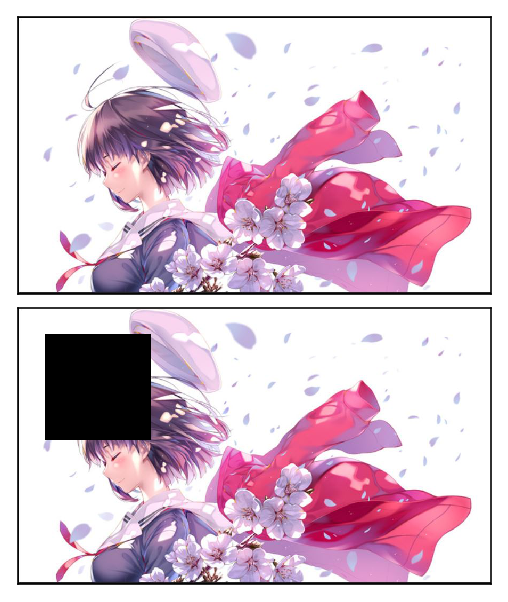

In [7]:
# 截取roi = region of interest
roi = img[100:150, 100:150]
#print(roi)

# 可以修改指定区域
img_copy2 = img.copy()
img_copy2[50:250, 50:250] = [0, 0, 0]
show_image([img, img_copy2])